# Rendering images in matplotlib
Images rendered by **fresnel** can be converted to RGBA arrays for display with the **imshow** command in **matplotlib**. This example shows how to build subplots that display the geometries of the Platonic Solids.

In [1]:
import numpy as np
import fresnel
import matplotlib.pyplot as plt

In [2]:
platonic_solid_vertices = {
    'Cube': [
        [-0.5, -0.5, -0.5],
        [-0.5, -0.5, 0.5],
        [-0.5, 0.5, -0.5],
        [-0.5, 0.5, 0.5],
        [0.5, -0.5, -0.5],
        [0.5, -0.5, 0.5],
        [0.5, 0.5, -0.5],
        [0.5, 0.5, 0.5]],
    'Dodecahedron': [
        [-1.37638, 0.0, 0.262866],
        [1.37638, 0.0, -0.262866],
        [-0.425325, -1.30902, 0.262866],
        [-0.425325, 1.30902, 0.262866],
        [1.11352, -0.809017, 0.262866],
        [1.11352, 0.809017, 0.262866],
        [-0.262866, -0.809017, 1.11352],
        [-0.262866, 0.809017, 1.11352],
        [-0.688191, -0.5, -1.11352],
        [-0.688191, 0.5, -1.11352],
        [0.688191, -0.5, 1.11352],
        [0.688191, 0.5, 1.11352],
        [0.850651, 0.0, -1.11352],
        [-1.11352, -0.809017, -0.262866],
        [-1.11352, 0.809017, -0.262866],
        [-0.850651, 0.0, 1.11352],
        [0.262866, -0.809017, -1.11352],
        [0.262866, 0.809017, -1.11352],
        [0.425325, -1.30902, -0.262866],
        [0.425325, 1.30902, -0.262866]],
    'Icosahedron': [
        [0.0, 0.0, -0.951057],
        [0.0, 0.0, 0.951057],
        [-0.850651, 0.0, -0.425325],
        [0.850651, 0.0, 0.425325],
        [0.688191, -0.5, -0.425325],
        [0.688191, 0.5, -0.425325],
        [-0.688191, -0.5, 0.425325],
        [-0.688191, 0.5, 0.425325],
        [-0.262866, -0.809017, -0.425325],
        [-0.262866, 0.809017, -0.425325],
        [0.262866, -0.809017, 0.425325],
        [0.262866, 0.809017, 0.425325]],
    'Octahedron': [
        [-0.707107, 0.0, 0.0],
        [0.0, 0.707107, 0.0],
        [0.0, 0.0, -0.707107],
        [0.0, 0.0, 0.707107],
        [0.0, -0.707107, 0.0],
        [0.707107, 0.0, 0.0]],
    'Tetrahedron': [
        [0.0, 0.0, 0.612372],
        [-0.288675, -0.5, -0.204124],
        [-0.288675, 0.5, -0.204124],
        [0.57735, 0.0, -0.204124]]
    }

The `render` function returns a NumPy array of the output buffer, which can be passed directly to **imshow**.

In [3]:
def render(shape):
    verts = platonic_solid_vertices[shape]
    scene = fresnel.Scene(fresnel.Device(mode='cpu'))
    scene.lights = fresnel.light.lightbox()
    poly_info = fresnel.util.convex_polyhedron_from_vertices(verts)
    geometry = fresnel.geometry.ConvexPolyhedron(
        scene, poly_info,
        position = [0, 0, 0],
        orientation = [0.975528, 0.154508, -0.154508, -0.024472],
        outline_width = 0.015)
    geometry.material = fresnel.material.Material(
        color = fresnel.color.linear([0.1, 0.1, 0.6]),
        roughness = 0.1,
        specular = 1)
    geometry.outline_material = fresnel.material.Material(
        color = (0.95,0.93,0.88),
        roughness = 0.1,
        metal = 1.0)

    scene.camera = fresnel.camera.fit(scene, view='front')
    out = fresnel.pathtrace(scene, samples=64,
                            light_samples=32,
                            w=200, h=200)
    return np.asarray(out.buf)

Below, **imshow** is used to render one scene in each subplot. Specifying an interpolation with **imshow** improves image quality.

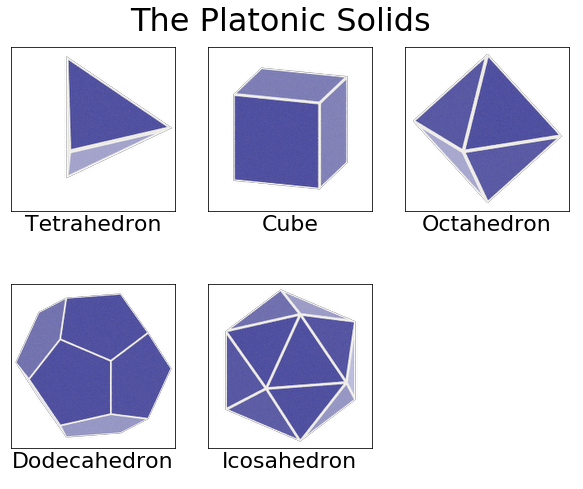

In [4]:
def show_shape(shape, location):
    ax = axs[location]
    ax.imshow(render(shape), interpolation='lanczos')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(shape, fontsize=22)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(10, 8))
show_shape('Tetrahedron', (0, 0))
show_shape('Cube', (0, 1))
show_shape('Octahedron', (0, 2))
show_shape('Dodecahedron', (1, 0))
show_shape('Icosahedron', (1, 1))
axs[1, 2].axis('off')
fig.suptitle('The Platonic Solids', y=0.92, fontsize=32)
plt.show()